In [1]:
import pymatgen as mg
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 7676-6C56

 Directory of C:\Users\Owner\Documents\Python Scripts\Otest\O102

06/14/2018  12:42 PM    <DIR>          .
06/14/2018  12:42 PM    <DIR>          ..
06/13/2018  02:59 PM    <DIR>          .ipynb_checkpoints
06/13/2018  02:19 PM           378,017 Analyze vasprun.ipynb
06/14/2018  12:42 PM           575,993 Band Structure of.ipynb
06/12/2018  09:50 PM               274 KPOINTS
06/13/2018  02:39 AM        12,590,826 vasprun.xml
               4 File(s)     13,545,110 bytes
               3 Dir(s)  172,820,819,968 bytes free


In [3]:
run = BSVasprun("vasprun.xml", parse_projected_eigen=True)

In [4]:
bs = run.get_band_structure("KPOINTS")

In [5]:
print("number of bands", bs.nb_bands)

number of bands 60


In [6]:
print("number of kpoints", len(bs.kpoints))

number of kpoints 40


In [7]:
bs.is_metal()

False

In [8]:
bs.is_spin_polarized

False

In [9]:
bs.bands

{<Spin.up: 1>: array([[-16.6739, -16.6647, -16.6393, ..., -16.7659, -16.8189, -16.8377],
        [-16.171 , -16.1846, -16.2222, ..., -16.1666, -16.1154, -16.0969],
        [ -3.9582,  -3.9504,  -3.9228, ...,  -4.0417,  -4.0648,  -4.073 ],
        ..., 
        [ 26.6012,  26.7147,  27.1605, ...,  31.1591,  31.4607,  31.6384],
        [ 30.3938,  30.7658,  29.58  , ...,  31.3634,  31.6956,  31.8977],
        [ 33.4571,  31.9255,  29.58  , ...,  31.6253,  31.8956,  31.9024]])}

In [10]:
bs.bands[Spin.up].shape

(60, 40)

In [11]:
bs.bands[Spin.up][9,:]

array([-0.4066, -0.3825, -0.3147, -0.2225, -0.1545, -0.1524, -0.1947,
       -0.2535, -0.321 , -0.3618, -0.3618, -0.3435, -0.3065, -0.259 ,
       -0.2021, -0.14  , -0.0794, -0.0297, -0.0724, -0.0953, -0.0953,
       -0.098 , -0.1059, -0.118 , -0.1332, -0.1502, -0.1675, -0.1841,
       -0.1987, -0.2106, -0.2106, -0.2225, -0.2263, -0.2211, -0.1496,
       -0.1303, -0.2032, -0.2741, -0.3319, -0.3618])

In [12]:
n = 0
for kpoints, e in zip(bs.kpoints, bs.bands[Spin.up][9,:]):
    n += 1
    if n == 11:
        print("...")
    if 10 < n < 190:
        continue
        
    print("kx = %5.3f  ky = %5.3f  kz = %5.3f  eps(k) = %8.4f" % (tuple(kpoints.frac_coords)+ (e,)))

kx = 0.500  ky = 0.500  kz = 0.500  eps(k) =  -0.4066
kx = 0.444  ky = 0.444  kz = 0.444  eps(k) =  -0.3825
kx = 0.389  ky = 0.389  kz = 0.389  eps(k) =  -0.3147
kx = 0.333  ky = 0.333  kz = 0.333  eps(k) =  -0.2225
kx = 0.278  ky = 0.278  kz = 0.278  eps(k) =  -0.1545
kx = 0.222  ky = 0.222  kz = 0.222  eps(k) =  -0.1524
kx = 0.167  ky = 0.167  kz = 0.167  eps(k) =  -0.1947
kx = 0.111  ky = 0.111  kz = 0.111  eps(k) =  -0.2535
kx = 0.056  ky = 0.056  kz = 0.056  eps(k) =  -0.3210
kx = 0.000  ky = 0.000  kz = 0.000  eps(k) =  -0.3618
...


In [13]:
bsplot = BSPlotter(bs)

3.12623413


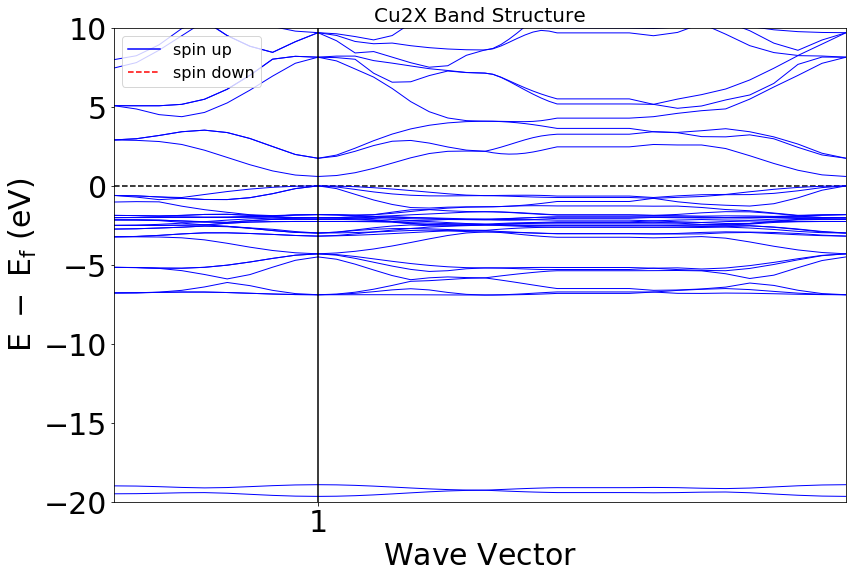

In [14]:
# get the plot
bsplot.get_plot(ylim=(-20, 10), zero_to_efermi=True)
print(bs.efermi)

# add some features
ax = plt.gca()
ax.set_title("Cu2X Band Structure", fontsize=20)
xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")

# add legend
ax.plot((), (), "b-", label="spin up")
ax.plot((), (), "r--", label="spin down")
ax.legend(fontsize=16, loc="upper left")

In [15]:
data = bsplot.bs_plot_data()

In [16]:
data.keys()

dict_keys(['ticks', 'distances', 'energy', 'vbm', 'cbm', 'lattice', 'zero_energy', 'is_metal', 'band_gap'])

In [17]:
ibands = 9 # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    print(20 * "-")
    for x, bands in zip(xpath, epath[spin][ibands]):
        print("%8.4f %8.4f" % (x, bands))

--------------------
  0.0000  -3.2263
  0.1410  -3.2022
  0.2820  -3.1344
  0.4231  -3.0422
  0.5641  -2.9742
  0.7051  -2.9721
  0.8461  -3.0144
  0.9871  -3.0732
  1.1282  -3.1407
  1.2692  -3.1815
--------------------
  1.2692  -3.1815
  1.3843  -3.1632
  1.4995  -3.1262
  1.6146  -3.0787
  1.7298  -3.0218
  1.8449  -2.9597
  1.9600  -2.8991
  2.0752  -2.8494
  2.1903  -2.8921
  2.3055  -2.9150
  2.3055  -2.9150
  2.3553  -2.9177
  2.4052  -2.9256
  2.4551  -2.9377
  2.5049  -2.9529
  2.5548  -2.9699
  2.6046  -2.9872
  2.6545  -3.0038
  2.7043  -3.0184
  2.7542  -3.0303
  3.2029  -3.0303
  3.3525  -3.0422
  3.5021  -3.0460
  3.6517  -3.0408
  3.8012  -2.9693
  3.9508  -2.9500
  4.1004  -3.0229
  4.2500  -3.0938
  4.3995  -3.1516
  4.5491  -3.1815


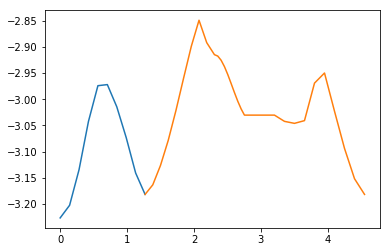

In [18]:
ibands = 9 # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    plt.plot(xpath, epath[spin][ibands])

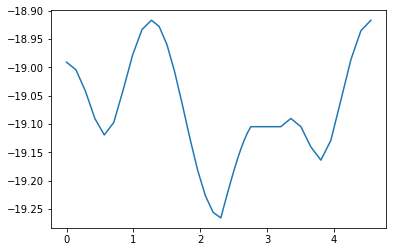

In [19]:
ibands = 1  # band number from 0 --> number of bands
spin = str(Spin.up)

x = list()
y = list()
for xpath, epath in zip(data["distances"], data["energy"]):
    x += xpath
    y += epath[spin][ibands]

plt.plot(x, y)

In [20]:
dosrun = Vasprun("vasprun.xml", parse_dos=True)
dos = dosrun.complete_dos
print(dosrun.efermi)
print(dos.efermi)

3.12623413
3.12623413


C:\Users\Owner\Anaconda3\lib\site-packages\pymatgen\io\vasp\outputs.py:877: UserWarning: No POTCAR file with matching TITEL fields was found in C:\Users\Owner\Documents\Python Scripts\Otest\O102
  " was found in {}".format(os.path.abspath(p)))


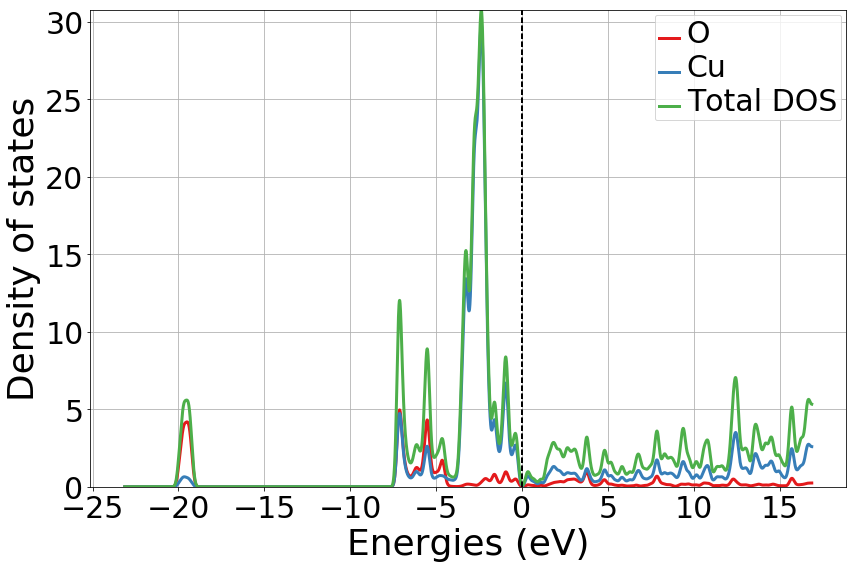

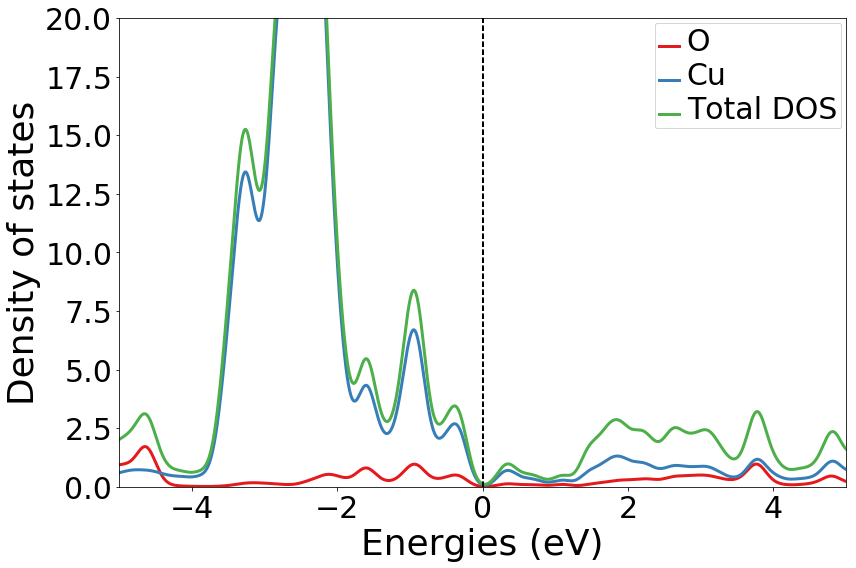

In [21]:
dosplot = DosPlotter(sigma=0.1)
dosplot.add_dos("Total DOS", dos)
dosplot.add_dos_dict(dos.get_element_dos())
plot = dosplot.get_plot()
plt.grid()
dosplot.show(xlim=[-5, 5], ylim=[0, 20])

In [22]:
bs = run.get_band_structure("KPOINTS", efermi=dos.efermi)

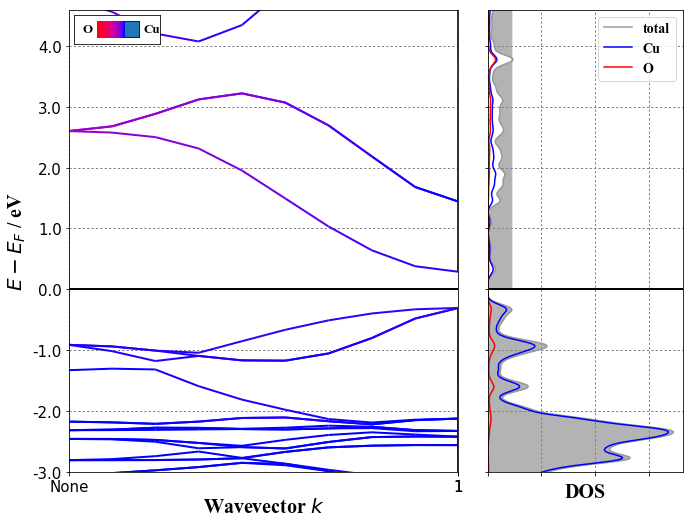

In [23]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements",
    dos_projection="elements",
    vb_energy_range=3,
    egrid_interval=1
)
plt = bsdosplot.get_plot(bs, dos=dos)

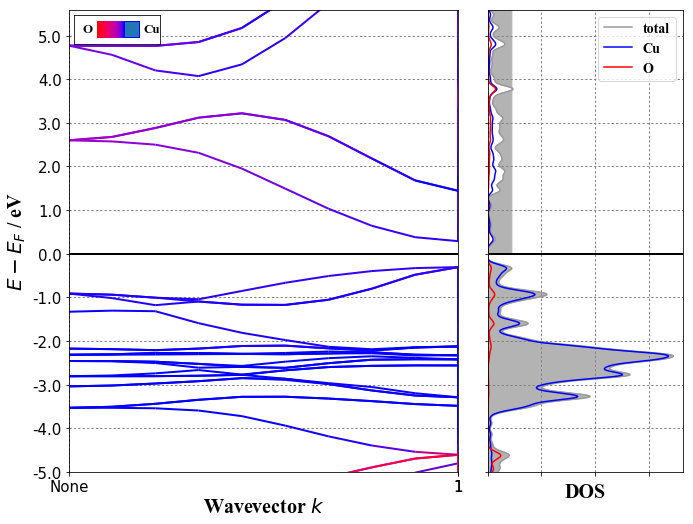

In [24]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements",
    dos_projection="elements",
    vb_energy_range=5,
    cb_energy_range=5,
    egrid_interval=1
)
plt = bsdosplot.get_plot(bs, dos=dos)